In [ ]:
import numpy as np
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt

In [50]:
true_series = [1, 3, 4, 9, 8, 7, 10, 15]
predicted_series = [1, 2, 4, 8, 8, 7, 11, 16]

In [51]:
def hausdorff_distance(true_series, predicted_series):
    """
    Calcule la distance de Hausdorff symétrique entre deux séries temporelles.

    Parameters:
    - true_series (array-like): Série temporelle réelle.
    - predicted_series (array-like): Série temporelle prédite.

    Returns:
    - float: Distance de Hausdorff symétrique.
    """
    A = np.array(true_series).reshape(-1, 1)
    B = np.array(predicted_series).reshape(-1, 1)
    
    forward_distance = directed_hausdorff(A, B)[0]
    backward_distance = directed_hausdorff(B, A)[0]
    
    return max(forward_distance, backward_distance)

In [52]:
distance = hausdorff_distance(true_series, predicted_series)
print(f"Distance de Hausdorff: {distance}")

Distance de Hausdorff: 1.0


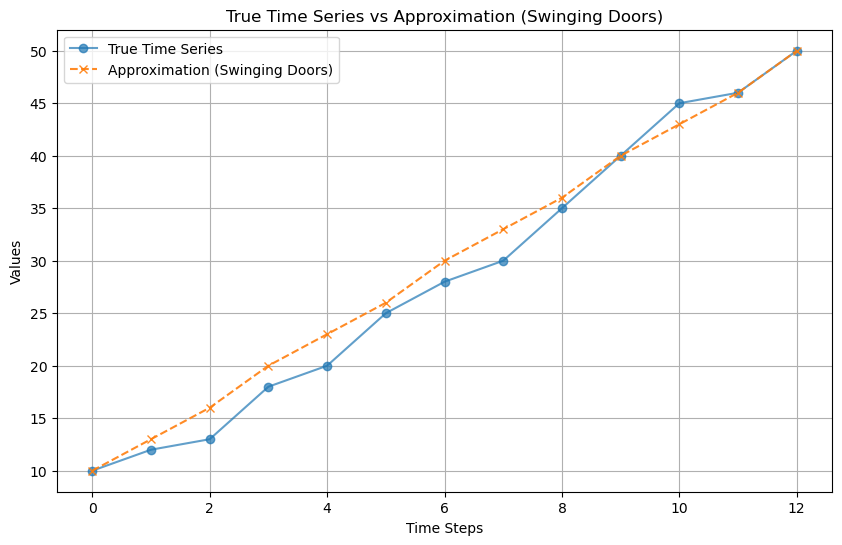

In [63]:
def swinging_doors(data, epsilon):
    SD_ts = np.zeros_like(data)
    lower_slope = +np.inf
    upper_slope = -np.inf
    start_idx = 0

    for i in range(1, len(data)):
        lower_slope = min(lower_slope, (data[i] - (data[start_idx] - epsilon)) / (i - start_idx))
        upper_slope = max(upper_slope, (data[i] - (data[start_idx] + epsilon)) / (i - start_idx))

        if lower_slope < upper_slope or i==len(data)-1:
            current_slope = (data[i] - data[start_idx]) / (i - start_idx)
            SD_ts[start_idx:i] = np.array([current_slope*j+data[start_idx] for j in range(i-start_idx)])
            start_idx = i      
            lower_slope = +np.inf
            upper_slope = -np.inf
    SD_ts[-1] = data[-1]
    return SD_ts

# Exemple d'utilisation
data = np.array([10, 12, 13, 18, 20, 25, 28, 30, 35, 40, 45, 46, 50])
epsilon = 20
ramp_approx = swinging_doors(data, epsilon)


plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data, label="True Time Series", marker='o', linestyle='-', alpha=0.7)
plt.plot(range(len(ramp_approx)), ramp_approx, label="Approximation (Swinging Doors)", marker='x', linestyle='--', alpha=0.9)
plt.title("True Time Series vs Approximation (Swinging Doors)")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def mae(ramp_approx_1, ramp_approx_2):
    return np.mean(np.abs(ramp_approx_1-ramp_approx_2))

def ramp_score(ts_1, ts_2, epsilon):
    ramp_approx_1 = swinging_doors(ts_1, epsilon)
    ramp_approx_2 = swinging_doors(ts_2, epsilon)
    return mae(ramp_approx_1, ramp_approx_2)

In [65]:
epsilon = 3
print(ramp_score(true_series, predicted_series, epsilon))

8.0
